In [1]:
import numpy as np
import pandas as pd

from pandas import DataFrame, Series  # for convenience

import matplotlib.pyplot as plt
import pims
import json
#from PIL import Image
import trackpy as tp

In [2]:
frames = pims.open("../vclab_V1/Fluo-N2DL-HeLa/01/*.tif")



In [5]:
f = tp.batch(frames[::1], 23, minmass=1000, invert=True);

Frame 91: 167 features


In [6]:
# Define path frame constraint and memory (Update)
t = tp.link_df(f, 10, memory=15)

Frame 91: 167 trajectories present.


In [7]:
t1 = tp.filter_stubs(t, 13)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())


Before: 2738
After: 304


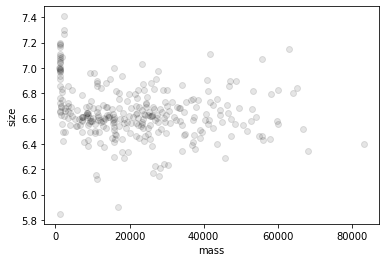

In [8]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean());

In [9]:
t2 = t1[((t1['mass'] > 1000) & (t1['size'] < 134990.0) &
         (t1['ecc'] < 0.45))]

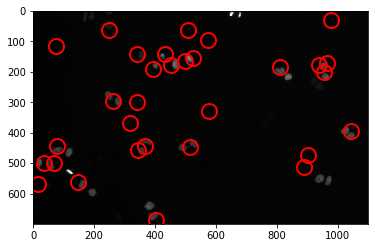

In [22]:
plt.figure()
tp.annotate(t2[t2['frame'] == 2], frames[2]);

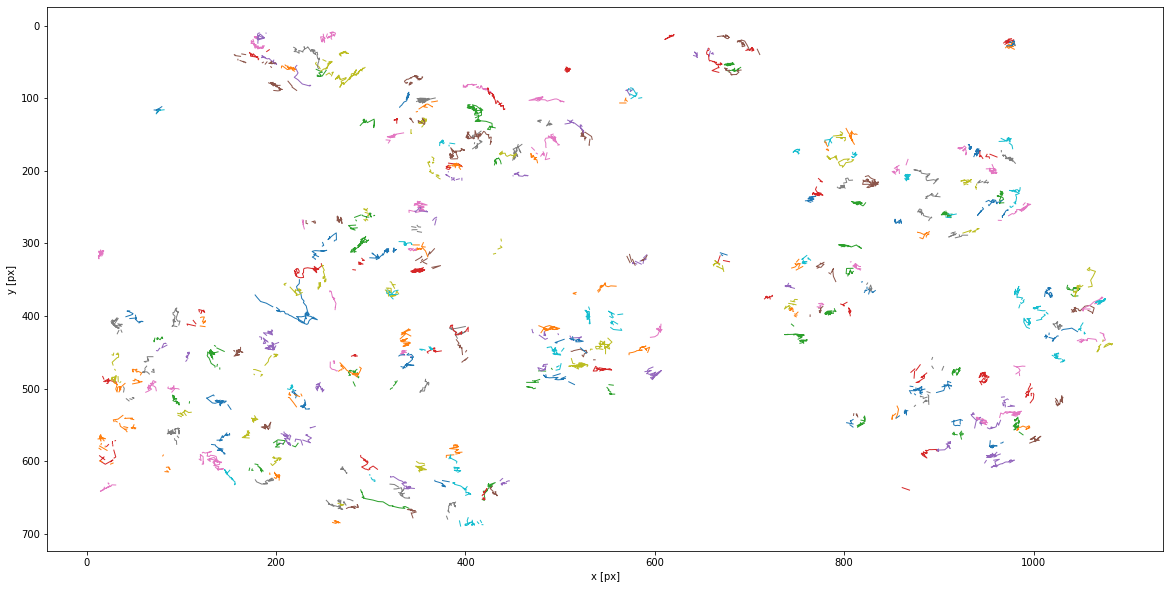

In [10]:
plt.figure(figsize=(20,10 ))

tp.plot_traj(t1,);

In [11]:
names = ['y','x','mass','size','ecc','signal','raw_mass','ep','frame','particle']
d = t1.to_dict(orient='record')
particles_np = np.array([d[i][names[-1]] for i in range(0,len(d)) ])
particles_list = np.unique(particles_np)
to_json={}

for j in particles_list:
   # print(j)
    s=[]
    f_l2=[]
    y_x2 = []
    s.append([d[i] for i in range(0,len(d)) if d[i][names[-1]]== j] )
   # print(s)
    f_l2.append([s[0][i][names[-2]] for i in range(0,len(s[0]))])
    #print(f_l2)
    y_x2.append([(s[0][i][names[1]], s[0][i][names[2]]) for i in range(0,len(s[0]))] )
    #print("\n")
    #print(y_x2)
    temp={}
    #temp["particle_is"] = str(j)
    temp["frame_list"] = f_l2[0]
    temp["cordinates"] = y_x2[0]
   # print(temp)
    to_json[str(j)] = temp

In [12]:
json.dumps(to_json)

'{"1": {"frame_list": [0, 5, 6, 12, 13, 17, 20, 21, 28, 29, 41, 55, 56, 57, 58, 60, 61, 62, 63, 65, 66, 67, 70, 73, 74, 76, 77, 78, 79, 80, 83], "cordinates": [[864.080225659367, 1473.6610287392496], [869.6855281548061, 1833.5184228390904], [872.5812459447851, 2112.3282251600444], [868.9836821314881, 1309.7304444295598], [870.7610812749929, 1456.386415942221], [873.5813754882171, 1286.509653034114], [875.3366349932624, 1789.649357803722], [874.3136653280837, 1392.5421090636862], [870.3398583250446, 1438.972602255299], [875.2770903484928, 1446.40806590006], [870.443811995145, 1288.026306595684], [875.775804592051, 1116.3245210338516], [876.1439010076128, 1276.2985306364099], [873.3789927758432, 1351.444619552788], [879.3654736526547, 1243.92083710917], [882.0947451530836, 1137.6248561527186], [881.8061330355516, 1271.216138414996], [876.8870429945991, 1321.823592452238], [877.6603068834025, 1553.5373293302785], [879.0880929484653, 1230.7586431615696], [878.4229702741512, 1330.6138297115

In [13]:
with open('dataPoints8.json', 'w') as fp:
    json.dump(to_json, fp)